# 패키지 임포트

In [1]:
## Read the data into a dataframe
import json
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/User/Desktop/News Category')
from data_preprocessing import *

In [2]:
data=[]
with open('C:/Users/user/Desktop/bilm-tf-master/textdataset/News_Category_Dataset_v3.json', 'r') as f:
    for line in f:
        content = json.loads(line)
        data.append(content)
df = pd.DataFrame(data=data)

In [3]:
df = df[~df['short_description'].apply(lambda x: len(x)==0)]
print(df.shape)

(189815, 6)


In [4]:
print("The dataset contains", df.category.nunique(), "categories.")

The dataset contains 42 categories.


In [5]:
#중복되는 카테고리 통합
df["category"] = df.category.replace(
    {
        "THE WORLDPOST": "WORLD NEWS",
        "WORLDPOST": "WORLD NEWS",
        "ARTS": "ARTS & CULTURE",
        "CULTURE & ARTS": "ARTS & CULTURE",
        "HEALTHY LIVING": "WELLNESS",
        "QUEER VOICES": "VOICES",
        "LATINO VOICES": "VOICES",
        "BLACK VOICES": "VOICES",
        "STYLE": "STYLE & BEATUY",
        "GREEN": "ENVIRONMENT",
        "TASTE": "FOOD & DRINK",
        "MONEY": "BUSINESS",
        "PARENTING": "PARENTS"
    }
)

In [6]:
print("The dataset contains", df.category.nunique(), "categories.")

The dataset contains 31 categories.


In [6]:
df.category.unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTS', 'WORLD NEWS', 'ARTS & CULTURE',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA', 'VOICES',
       'HOME & LIVING', 'WOMEN', 'TRAVEL', 'RELIGION', 'IMPACT',
       'WEDDINGS', 'COLLEGE', 'STYLE & BEATUY', 'GOOD NEWS', 'FIFTY',
       'DIVORCE'], dtype=object)

Text(0.5, 1.0, 'Category distribution')

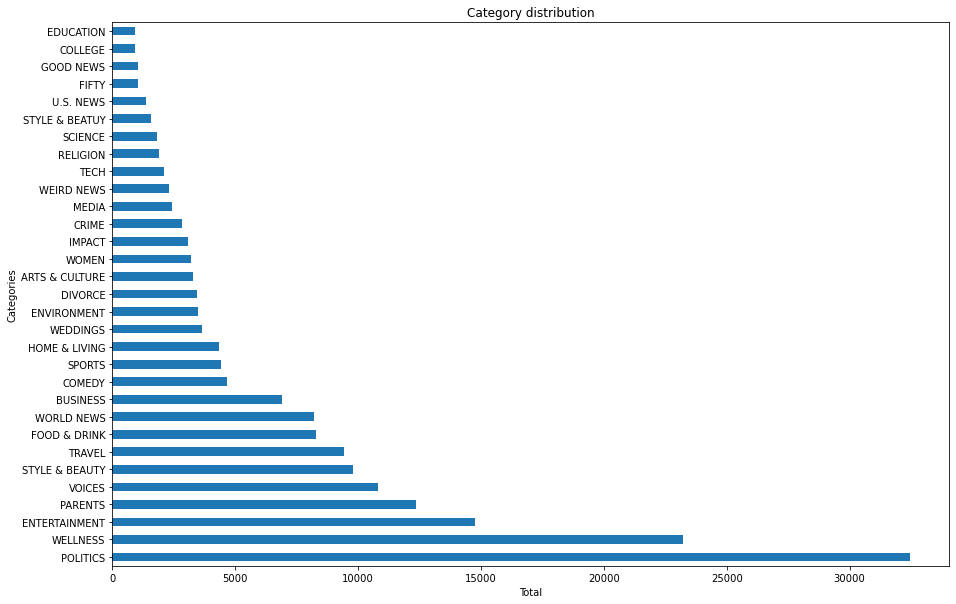

In [7]:
df.category.value_counts().plot(kind='barh', figsize=(15,10))
plt.xlabel("Total")
plt.ylabel("Categories")
plt.title("Category distribution")

In [8]:
df = df[['headline', 'short_description','category']]
df['input_data']= df.apply(lambda x: str(x['headline']) + str(x['short_description']), axis=1)

In [10]:
df['clean_text']=df['input_data'].apply(clean_text)

In [11]:
df.category.value_counts()

POLITICS          32441
WELLNESS          23208
ENTERTAINMENT     14774
PARENTS           12346
VOICES            10802
STYLE & BEAUTY     9802
TRAVEL             9421
FOOD & DRINK       8271
WORLD NEWS         8203
BUSINESS           6887
COMEDY             4642
SPORTS             4414
HOME & LIVING      4317
WEDDINGS           3653
ENVIRONMENT        3488
DIVORCE            3426
ARTS & CULTURE     3265
WOMEN              3184
IMPACT             3086
CRIME              2832
MEDIA              2404
WEIRD NEWS         2316
TECH               2103
RELIGION           1879
SCIENCE            1803
STYLE & BEATUY     1567
U.S. NEWS          1377
FIFTY              1042
GOOD NEWS          1039
COLLEGE             921
EDUCATION           902
Name: category, dtype: int64

In [12]:
class0=list(df[df['category'] == 'POLITICS'].sample(1000, random_state=1)['clean_text'])
class1=list(df[df['category'] == 'WELLNESS'].sample(1000, random_state=1)['clean_text'])
class2=list(df[df['category'] == 'ENTERTAINMENT'].sample(1000, random_state=1)['clean_text'])
class3=list(df[df['category'] == 'PARENTS'].sample(1000, random_state=1)['clean_text'])
class4=list(df[df['category'] == 'VOICES'].sample(1000, random_state=1)['clean_text'])
class5=list(df[df['category'] == 'STYLE & BEAUTY'].sample(1000, random_state=1)['clean_text'])
class6=list(df[df['category'] == 'TRAVEL'].sample(1000, random_state=1)['clean_text'])
class7=list(df[df['category'] == 'FOOD & DRINK'].sample(1000, random_state=1)['clean_text'])
class8=list(df[df['category'] == 'WORLD NEWS'].sample(1000, random_state=1)['clean_text'])
class9=list(df[df['category'] == 'BUSINESS'].sample(1000, random_state=1)['clean_text'])

In [13]:
X_list=class0+class1+class2+class3+class4+class5+class6+class7+class8+class9

In [14]:
y=[]
for i in range(10):
    y+=[i]*1000

In [15]:
clr_x_data=[]
pattern = '[^a-z ]'
for sen in X_list:
    clr_x_data.append(re.sub(pattern, ' ', sen))

In [16]:
X_list=[]
for sen in clr_x_data:
    X_list.append(' '.join(sen.split()))

In [17]:
train_idx=[]
for i in range(10):
    train_idx+=[j+i*1000 for j in range(800)]

test_idx=[]
for i in range(10):
    test_idx+=[j+800+i*1000 for j in range(200)]

In [18]:
x_train=[]
y_train=[]
for i in train_idx:
    x_train.append(X_list[i])
    y_train.append(y[i])

x_test=[]
y_test=[]
for i in test_idx:
    x_test.append(X_list[i])
    y_test.append(y[i])